In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_excel("Data/2017_PM10_1g.xlsx") # load

In [7]:
df.head(10)                             # look

,Nr,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,Kod stacji,DsBoleslaMOB,DsDzialoszyn,DsDziePilsud,DsJelGorOgin,DsKlodzSzkol,DsKudowaMOB,DsLegAlRzecz,DsNowRudSreb,DsWalbrzWyso,...,WpBoroDrapal,WpKaliSawick,WpKoniWyszyn,WpPilaKusoci,WpPoznDabrow,WpPoznPolank,ZpKoszArKraj,ZpSzczAndr01,ZpSzczecPrze,ZpSzczLacz04
1,Wskaźnik,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,...,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10
2,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
3,Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
4,Kod stanowiska,DsBoleslaMOB-PM10-1g,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJelGorOgin-PM10-1g,DsKlodzSzkol-PM10-1g,DsKudowaMOB-PM10-1g,DsLegAlRzecz-PM10-1g,DsNowRudSreb-PM10-1g,DsWalbrzWyso-PM10-1g,...,WpBoroDrapal-PM10-1g,WpKaliSawick-PM10-1g,WpKoniWyszyn-PM10-1g,WpPilaKusoci-PM10-1g,WpPoznDabrow-PM10-1g,WpPoznPolank-PM10-1g,ZpKoszArKraj-PM10-1g,ZpSzczAndr01-PM10-1g,ZpSzczecPrze-PM10-1g,ZpSzczLacz04-PM10-1g
5,2017-01-01 01:00:00,NaN,"53,3963","405,0","226,603","289,173",NaN,"80,1625","446,146","467,889",...,"23,4837","61,8409","18,53","62,105","33,2655","47,02","24,221","60,0293","20,2558","24,1928"
6,2017-01-01 02:00:00,NaN,"52,9082","310,984","229,432","265,72",NaN,"38,6769","473,629","144,374",...,"44,2607","117,002","20,0714","114,091","46,4343","62,9012","24,9919","50,9891","17,4999","83,2406"
7,2017-01-01 03:00:00,NaN,"51,3831","455,381","253,827","243,228",NaN,"47,0206","336,169","61,1247",...,"40,7959","32,0493","21,63","19,2682","29,8119","65,17","15,8157","34,6693","8,88873","39,7984"
8,2017-01-01 04:00:00,NaN,"44,6262","290,6","225,692","258,756",NaN,"31,2669","285,767","65,8004",...,"19,5365","31,6062","23,7979","13,1749","30,7476","65,17","9,87341","28,0312","7,46767","30,2386"
9,2017-01-01 05:00:00,NaN,"41,5999","263,553","254,761","242,493",NaN,"53,598","270,204","59,9626",...,"23,4659","26,8417","25,99","14,5591","31,2552","58,6162","13,6186","28,9273","8,14248","28,8418"


In [4]:
df.info()   # they are not stored as nunmeric data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765 entries, 0 to 8764
Columns: 124 entries, Nr to 123
dtypes: object(124)
memory usage: 8.3+ MB


In [12]:
# I picked a column with no empty values
Dzialoszyn_df = data.iloc[5:,3]

In [13]:
Dzialoszyn_df[0:10]   # they used "," instead of "."

5       405,0
6     310,984
7     455,381
8       290,6
9     263,553
10    170,725
11    133,309
12    111,125
13     179,91
14    162,899
Name: 3, dtype: object

In [15]:
replaced = Dzialoszyn_df.str.replace(",",".")   # replaced with dot

In [16]:
replaced[0:10]

5       405.0
6     310.984
7     455.381
8       290.6
9     263.553
10    170.725
11    133.309
12    111.125
13     179.91
14    162.899
Name: 3, dtype: object

In [17]:
numeric = pd.to_numeric(replaced)  # make them all float

In [18]:
numeric[0:10]

5     405.000
6     310.984
7     455.381
8     290.600
9     263.553
10    170.725
11    133.309
12    111.125
13    179.910
14    162.899
Name: 3, dtype: float64

In [22]:
np.isnan(numeric).any()

295

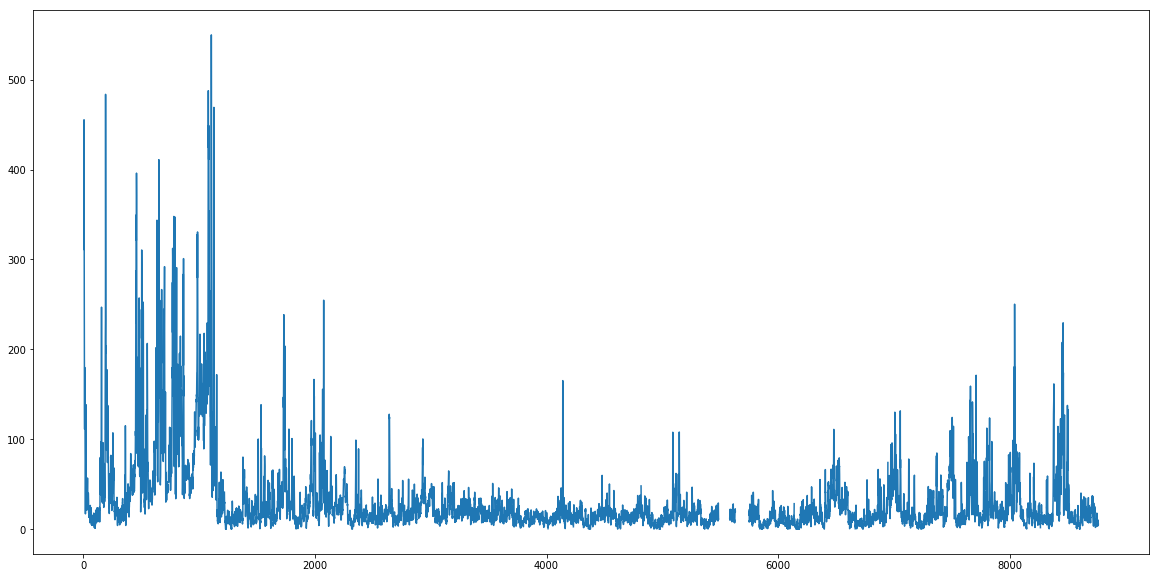

In [20]:
plt.figure(figsize=(20,10))
plt.plot(numeric)
plt.show()

# Select best stations

In [91]:
count_nans = df.iloc[5:, 2:].isna().sum()
best_stations_index = count_nans.nsmallest(10).index
best_stations = df[best_stations_index].iloc[5:,:]
best_stations.columns = df[best_stations_index].loc[[0]].values[0]
best_stations.head()

,MpTarRoSitko,SlTychyTolst,ZpKoszArKraj,MpNoSaczNadb,ZpSzczecPrze,MpKrakAlKras,PmGdaKacze02,SlWodzGalczy,SlRybniBorki,MzPlocMiReja
5,"286,547","43,767","24,221","430,315","20,2558","213,733","22,1","97,5863","56,9406","49,591231"
6,"277,584","36,3929","24,9919","289,301","17,4999","213,868","11,9","97,6305","60,6056","39,695604"
7,"294,011","38,949","15,8157","251,635","8,88873","221,923","4,8","66,6252","54,7129","39,695604"
8,"234,649","39,6057","9,87341","235,258","7,46767","244,69","5,1","53,7598","47,2334","39,695604"
9,"196,482","37,7051","13,6186","189,809","8,14248","224,673","5,1","48,948","42,1408","39,695604"


# Preprocessing

In [96]:
def preprocessData(data):
    data_dot = data.str.replace(",",".")
    data_numeric = pd.to_numeric(data_dot)

In [105]:
best_stations_df = pd.DataFrame([pd.to_numeric(best_stations[station].str.replace(",",".")) for station in best_stations])
best_stations_df = df_best.transpose()
best_stations_df.head()

,MpTarRoSitko,SlTychyTolst,ZpKoszArKraj,MpNoSaczNadb,ZpSzczecPrze,MpKrakAlKras,PmGdaKacze02,SlWodzGalczy,SlRybniBorki,MzPlocMiReja
5,286.547,43.7670,24.22100,430.315,20.25580,213.733,22.1,97.5863,56.9406,49.591231
6,277.584,36.3929,24.99190,289.301,17.49990,213.868,11.9,97.6305,60.6056,39.695604
7,294.011,38.9490,15.81570,251.635,8.88873,221.923,4.8,66.6252,54.7129,39.695604
8,234.649,39.6057,9.87341,235.258,7.46767,244.690,5.1,53.7598,47.2334,39.695604
9,196.482,37.7051,13.61860,189.809,8.14248,224.673,5.1,48.9480,42.1408,39.695604


# Plotting

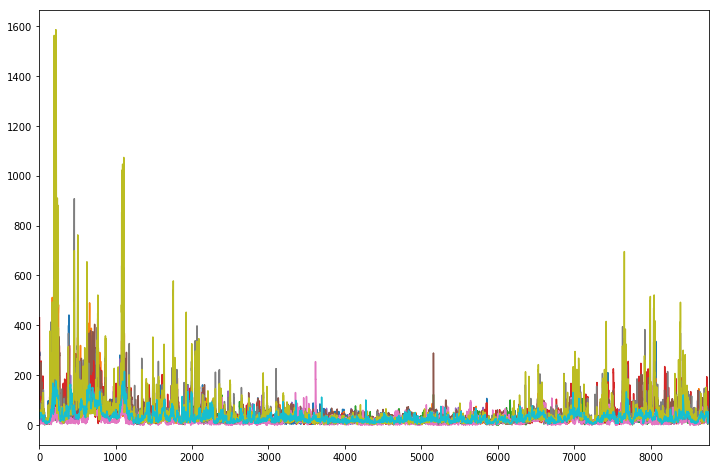

In [108]:
for station in best_stations_df:
    best_stations_df[station].plot(figsize=(12,8))

In [111]:
best_stations_df.isna().sum()

MpTarRoSitko     3
SlTychyTolst    10
ZpKoszArKraj    16
MpNoSaczNadb    18
ZpSzczecPrze    20
MpKrakAlKras    21
PmGdaKacze02    27
SlWodzGalczy    30
SlRybniBorki    35
MzPlocMiReja    38
dtype: int64